# Cas Kaggle: 
## Preferències d'una persona en pelicules a partir de la seva personalitat.

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

dataset0 = pd.read_csv("2018-personality-data.csv")
dataset0.drop(columns=dataset0.columns[-26:], axis=1, inplace=True)
dataset1 = pd.read_csv("2018_ratings.csv")
dataset1.drop(columns=dataset1.columns[-1], axis=1, inplace=True)

dataset1.head() 


,userid,movie_id,rating
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0


In [242]:
dataset0.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium


In [243]:
dataset = pd.merge(dataset1, dataset0, on='userid')
dataset.rename(columns={' movie_id': 'movie_id', ' rating': 'rating', ' openness': 'openness', ' agreeableness': 'agreeableness', ' emotional_stability': 'emotional_stability', ' conscientiousness': 'conscentiousness', ' extraversion': 'extraversion', ' assigned metric': 'assigned metric', ' assigned condition': 'assigned condition'}, inplace=True)
dataset.head()

,userid,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,assigned metric,assigned condition
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,5.0,2.0,3.0,2.5,6.5,serendipity,high
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,5.0,2.0,3.0,2.5,6.5,serendipity,high


In [244]:
print(dataset.columns.tolist())

['userid', 'movie_id', 'rating', 'openness', 'agreeableness', 'emotional_stability', 'conscentiousness', 'extraversion', 'assigned metric', 'assigned condition']


Ara que ja tenim les dades que considerem necesàries en un sol dataframe, el primer que farem serà passar els atributs 'assigned metric' i 'assigned condition' a valors numerics.

assigned metric: serendipity, popularity, diversity, all
asigned condition: high, medium, low, default

In [245]:
encoder = LabelBinarizer()
encoder.fit(dataset['assigned metric'])
transformed = encoder.transform(dataset['assigned metric'])
data0 = pd.DataFrame(transformed)
dataset = pd.concat([dataset, data0], axis=1).drop(['assigned metric'], axis=1)
dataset.rename(columns={0: 'all', 1: 'diversity', 2: 'popularity', 3: 'serendipity'}, inplace=True)
dataset.head()

,userid,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,assigned condition,all,diversity,popularity,serendipity
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,5.0,2.0,3.0,2.5,6.5,high,0,0,0,1


In [246]:
encoder = LabelBinarizer()
encoder.fit(dataset['assigned condition'])
transformed = encoder.transform(dataset['assigned condition'])
data0 = pd.DataFrame(transformed)
dataset = pd.concat([dataset, data0], axis=1).drop(['assigned condition'], axis=1)
dataset.rename(columns={0: 'default', 1: 'high', 2: 'low', 3: 'medium'}, inplace=True)
dataset.drop(["default", "userid"], axis=1, inplace=True)
data = dataset.values
x = data[:, np.array([True, False, True, True, True, True, True, True, True, True, True, True, True, True])]
y = data[:, 1]
dataset.head()

,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,all,diversity,popularity,serendipity,high,low,medium
0,1,5.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
1,2,4.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
2,3,4.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
3,5,5.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0
4,6,4.0,5.0,2.0,3.0,2.5,6.5,0,0,0,1,1,0,0


Com l'únic que ens interessa de la persona són les dades sobre la seva personalitat, ens hem desfet del userId. També ens hem desfet de l'atribut default ja que és el mateix que l'atribut all.

In [247]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070203 entries, 0 to 1070202
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   movie_id             1070203 non-null  int64  
 1   rating               1070203 non-null  float64
 2   openness             1070203 non-null  float64
 3   agreeableness        1070203 non-null  float64
 4   emotional_stability  1070203 non-null  float64
 5   conscentiousness     1070203 non-null  float64
 6   extraversion         1070203 non-null  float64
 7   all                  1070203 non-null  int32  
 8   diversity            1070203 non-null  int32  
 9   popularity           1070203 non-null  int32  
 10  serendipity          1070203 non-null  int32  
 11  high                 1070203 non-null  int32  
 12  low                  1070203 non-null  int32  
 13  medium               1070203 non-null  int32  
dtypes: float64(6), int32(7), int64(1)
memory usage: 93

In [248]:
dataset.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,movie_id,rating,openness,agreeableness,emotional_stability,conscentiousness,extraversion,all,diversity,popularity,serendipity,high,low,medium
count,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00,1070203.00
mean,41890.69,3.37,5.36,4.20,4.59,4.70,3.41,0.14,0.27,0.30,0.29,0.29,0.29,0.28
std,48530.99,1.00,1.05,1.18,1.37,1.27,1.44,0.35,0.44,0.46,0.45,0.45,0.45,0.45
min,1.00,0.50,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2706.00,3.00,4.50,3.50,3.50,4.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7982.00,3.50,5.50,4.00,4.50,4.50,3.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,78342.00,4.00,6.00,5.00,5.50,5.50,4.50,0.00,1.00,1.00,1.00,1.00,1.00,1.00
max,198117.00,5.00,7.00,7.00,7.00,7.00,7.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Heatmaps + Pairplots

<AxesSubplot:>

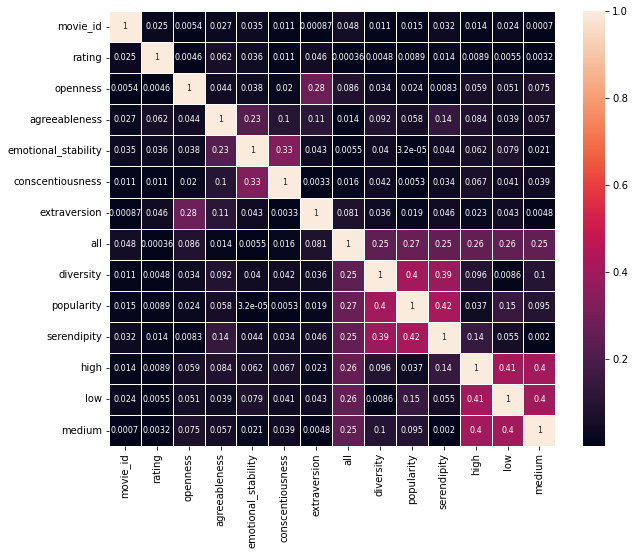

In [249]:
co = dataset.corr()
plt.figure(figsize=[10, 8])
sns.heatmap(np.abs(co), annot=True, linewidths=0.5, annot_kws={"size":8})

array([[<AxesSubplot:title={'center':'movie_id'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'openness'}>,
        <AxesSubplot:title={'center':'agreeableness'}>],
       [<AxesSubplot:title={'center':'emotional_stability'}>,
        <AxesSubplot:title={'center':'conscentiousness'}>,
        <AxesSubplot:title={'center':'extraversion'}>,
        <AxesSubplot:title={'center':'all'}>],
       [<AxesSubplot:title={'center':'diversity'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'serendipity'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'medium'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

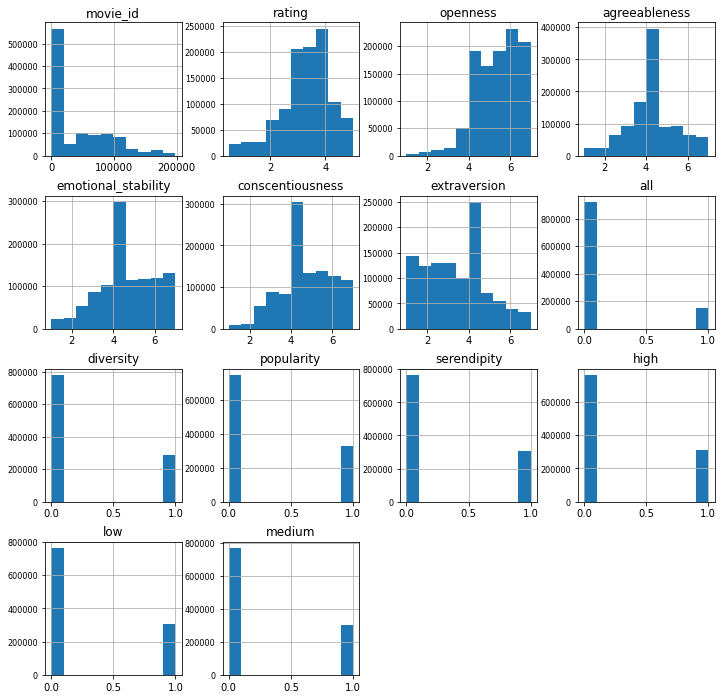

In [250]:
dataset.hist(figsize=[12, 12], ylabelsize=8, )
#rel = sns.pairplot(dataset)

### Normalització + Crossvalidation

Primer escollirem el tipus de normalització que volem utilitzar en el nostre dataset entre aquestes 8 opcions: Sense Normalització, Minmax Scaler, Standard Scaler, Robust Scaler, Yeo-Johnson Scaler (PowerTransformer), Quantile Transformer (Uniform), Quantile Transformer (Gaussian), Normalizer. Per mesurar quina normalització és la millor, els hi aplicarem una simple regressió lineal i veurem quina dona un millor mse. 

In [ ]:
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
from statistics import mean

x = x.astype(float)
y = y.astype(float)

minmax = sklearn.preprocessing.MinMaxScaler()

standard = sklearn.preprocessing.StandardScaler()

robust = sklearn.preprocessing.RobustScaler()

yeoJohnson = sklearn.preprocessing.PowerTransformer()

quantileUniform = sklearn.preprocessing.QuantileTransformer()

quantileGaussian = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

normalizer = sklearn.preprocessing.Normalizer()


linearReg = sklearn.linear_model.LinearRegression()

skf = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True)
mse_sense = []
mse_minmax = []
mse_standard = []
mse_robust = []
mse_yeoJohnson = []
mse_quantUniform = []
mse_quantGaussian = []
mse_normalizer = []


#Sense normalització
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    linearReg.fit(x_train, y_train)
    y_pred = linearReg.predict(x_test)
    mse_sense.append(mean_squared_error(y_pred, y_test))

print('\nSense Scaler:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(mse_sense)*100, '%')
print('\nMinimum Accuracy:',
      min(mse_sense)*100, '%')
print('\nOverall Accuracy:',
      mean(mse_sense)*100, '%')
    

#MinMax

for train_index, test_index in skf.split(x_minmax, y):
    x_train, x_test = x_minmax[train_index], x_minmax[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logisticReg.fit(x_train, y_train)
    accuracy_minmax.append(logisticReg.score(x_test, y_test))

print('\nMinMax Scaler')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_minmax)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_minmax)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_minmax)*100, '%')


#Standard_Scaler

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = standard.fit_transform(x_train)
    x_test = standard.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logisticReg.fit(x_train, y_train)
    accuracy_standard.append(logisticReg.score(x_test, y_test))

print('\nStandard Scaler:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_standard)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_standard)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_standard)*100, '%')

#Robust_Scaler

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = robust.fit_transform(x_train)
    x_test = robust.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logisticReg.fit(x_train, y_train)
    accuracy_robust.append(logisticReg.score(x_test, y_test))

print('\nRobust Scaler:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_robust)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_robust)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_robust)*100, '%')

#Yeo-Johson

for train_index, test_index in skf.split(x, y):   
    x_train, x_test = x[train_index], x[test_index]
    
    x_train = yeoJohnson.fit_transform(x_train)
    x_test = yeoJohnson.transform(x_test)
    
    y_train, y_test = y[train_index], y[test_index]
    logisticReg.fit(x_train, y_train)
    accuracy_yeoJohnson.append(logisticReg.score(x_test, y_test))

print('\nYeo-Johnson Scaler:')
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(accuracy_yeoJohnson)*100, '%')
print('\nMinimum Accuracy:',
      min(accuracy_yeoJohnson)*100, '%')
print('\nOverall Accuracy:',
      mean(accuracy_yeoJohnson)*100, '%')